In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {c: i+1 for i , c in enumerate(chars)}
stoi ['.'] = 0
itos = {i: c for c , i in stoi.items()}
print (itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
# build the dataset 

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]: 

    print (w)
    context = [0] * block_size # context window [0, 0, 0]
    for ch in w + '.': 
        ix = stoi[ch]
        #print (ch, ix)
        X.append(context)
        Y.append(ix)
        print ( ''.join(itos[i] for i in context), '->', itos[ix])
        context = context[1:] + [ix] # add new char in the end and removes the first one
X = torch.tensor(X) # X has trigram contexts
Y = torch.tensor(Y) # Y has index of each character that the trigram corresponds to. For example for first letter e, trigram is [0, 0, 0] and Y[0] = 5; for second letter e, trigram is [0, 0, 5] and Y[1] = 5; 

emma
... -> e
..e -> m
.em -> m
emm -> a
mma -> .
olivia
... -> o
..o -> l
.ol -> i
oli -> v
liv -> i
ivi -> a
via -> .
ava
... -> a
..a -> v
.av -> a
ava -> .
isabella
... -> i
..i -> s
.is -> a
isa -> b
sab -> e
abe -> l
bel -> l
ell -> a
lla -> .
sophia
... -> s
..s -> o
.so -> p
sop -> h
oph -> i
phi -> a
hia -> .


In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [8]:
# In previous makemore the way we coded the neural net is by:
# 1. defining the weights N  into a matrix W 
# 2. Then, multiplied the weights by the input - one-hot vector which will give the connected output neurons
# 3. Instead of doing this.. We can directly use the embedding layer into C matrix by including the list trigrams X features (2) and add this list in C matrix
# 4. In pytorch emb = C[X] will give the same result as emb = W[X] in makemore

In [9]:
C = torch.randn(27,2)


In [10]:
emb = C[X] # embedding layer
emb.shape

torch.Size([32, 3, 2])

In [11]:
w1 = torch.randn(6, 100) # 3 * 2 = 6 (inputs) and 100 is the number of neurons in the hidden layer
b1 = torch.randn(100) # biases for each neuron 


In [12]:
emb @ w1 + b1 #  how do we do this?  - This will not work emb is 32 x 3 x 2 and w1 is 6 x 100. We need to reshape emb to 32 x 6 and then do the multiplication

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [ ]:
# one approach is the torch.cat 
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], dim=1).shape
# we are concatenating across dimension not 0, or 2. So 3 x 2 will become [ [a, 1] [b, 2] [c, 3] ] -> [a, 1, b, 2, c, 3]

# this would not scale, if we change our block_size to 4, we would need to change the code above to 4 x 2. So we can use torch.unbind

torch.Size([32, 6])

In [ ]:
torch.unbind(emb, dim=1) # unbind will give us a list of tensors, each tensor is 32 x 2
torch.cat(torch.unbind(emb, dim=1), dim=1).shape

torch.Size([32, 6])

In [ ]:
a = torch.arange(18)

In [ ]:
# we can reshape this single dimension into as many dimensions as we want as long as the total number of elements is the same =
# 18 = 3 x 2 x 3
# 18 = 9 x 2

a.view(3,2,3) # 3 x 2 x 3 = 18

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])

In [ ]:
a.storage() # this is the underlying storage of the tensor

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [ ]:
emb.shape

torch.Size([32, 3, 2])

In [ ]:
emb.view(32, 6) # 32 x 3 x 2 = 32 x 6
emb.view(32, 6) == torch.cat(torch.unbind(emb, dim=1), dim=1) # both are same.

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [ ]:
# now we can do the multiplication with the weights
h = emb.view(32, 6) @ w1 + b1
# instead of hardcoding the 32, we can use -1 or [0] to infer the size of the dimension
h = emb.view(-1, 6) @ w1 + b1 # 32 x 6 @ 6 x 100 + 100 = 32 x 100; It will infer the size of the dimension from w1

tensor([[ 3.3002, -2.0831,  1.8616,  ...,  0.1475,  1.7895,  1.5449],
        [-0.6571, -3.2786,  2.7076,  ..., -1.3623,  2.2175, -0.6975],
        [-1.4589, -0.6408,  0.2801,  ...,  0.5147,  2.9043,  2.2049],
        ...,
        [ 4.1920, -0.8238,  3.2839,  ..., -2.6398, -1.6159,  1.8420],
        [-0.0802, -3.7357,  1.8953,  ..., -0.5957,  4.0570,  0.2833],
        [ 0.4761, -0.4648,  1.5817,  ...,  0.3626,  2.1255,  2.1941]])

In [ ]:
h = 

In [ ]:
# C is the lookup table for the embedding layer. In the paper they have taken 17,000 words and brought it down to 30 dimensions. Here we have 27 characters and we have brought it down to 2 dimensions. 2 dimensions because we are predicting next character. In the paper they have 30 dimensions because they are predicting the next word they are narrowing down the 30 words that are most likely to follow the current 3 word set. 
C = torch.randn((27,2))

In [ ]:
C[5]

tensor([ 1.1050, -0.5499])

In [ ]:
F.one_hot(torch.tensor([5]), num_classes=27)

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [ ]:
F.one_hot(torch.tensor([5]), num_classes=27).float() @ C
# this is the same as C[5]; we arrived at this by doing one-hot encoding of 5 and then multiplying it by C
# Since bother are same, we can treat this as layer of the neural network will equal distribution 

tensor([[-0.0217, -0.3261]])

In [ ]:
C[[5, 10, 15]] # we can index with a list of indices

tensor([[ 1.1050, -0.5499],
        [ 0.8862, -1.7515],
        [ 0.5974,  1.5236]])

In [ ]:
C[torch.tensor([5,6,7,7,7,7])] # we can index with a tensor of indices

tensor([[ 1.1050, -0.5499],
        [-0.0225,  0.4510],
        [-0.6372,  0.8603],
        [-0.6372,  0.8603],
        [-0.6372,  0.8603],
        [-0.6372,  0.8603]])

In [ ]:
C[X] # we can do multi-dimensional indexing 
C[X].shape

torch.Size([32, 3, 2])

In [ ]:
X[13,2]


tensor(1)

In [ ]:
C[X][13,2] 

tensor([0.6771, 1.5519])

In [ ]:
C[2]

tensor([1.8223, 0.8383])

In [ ]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
context = [0] * 3
context = context[1:] + ['c']
context = context[1:] + ['d']
context
print ( 'emma' + '.')

emma.


In [ ]:
# Lets catch up where we left off
# We have created the windows of context and the next character
# We have created the embedding layer
X.shape, X.dtype, Y.shape, Y.dtype
# X has trigram contexts, Y has index of character that is most likely to follow the trigram

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [ ]:
# We X and Y to create the embedding layer. We have to encode the X and Y into the bigram tabular format to calculate the probabilities. That means we have to create a bigram table with the counts of each bigram and the counts of each character following the bigram, which we have. To convert the X and Y into the bigram table, into nueral net we have to change this input from characters to one-hot encoded matrix. 
#[One-hot-encoding]*[Bigram table [C]]*[Weights & Biases] * [Neurons] = [Output] 
C = torch.randn(27,2) # 27 characters and 2 features (x,y)
emb = C[X] # embedding layer # shortcut to one-hot encoding, both are same which will be for X = 32 X 3 and Y = 32 X 1 
emb.shape

torch.Size([32, 3, 2])

In [ ]:
W1 = torch.randn(6, 100) # 3 * 2 = 6 (inputs) and 100 is the number of neurons in the hidden layer
b1 = torch.randn(100) # biases for each neuron
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 x 6 @ 6 x 100 + 100 = 32 x 100; It will infer the size of the dimension from w1

In [ ]:
h.shape

torch.Size([32, 100])

In [ ]:
# final layer
W2 = torch.randn(100, 27) # 100 neurons in the hidden layer and 27 characters in the output layer
b2 = torch.randn(27) # biases for each output 
logits = h @ W2 + b2 # 32 x 100 @ 100 x 27 + 27 = 32 x 27

In [ ]:
logits.shape

torch.Size([32, 27])

In [ ]:
counts = logits.exp()

In [ ]:
probs = counts / counts.sum(dim=1, keepdim=True)

In [ ]:
probs.shape # 32 x 27

torch.Size([32, 27])

In [ ]:
probs 
probs[0].sum()  # sum of all the probabilities for the first row is 1.0

tensor(1.)

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
probs[torch.arange(32), Y] # this will give us the probability of the character that is most likely to follow the trigram


tensor([9.4657e-06, 4.5898e-10, 2.1366e-13, 2.2602e-12, 3.5437e-08, 2.1004e-13,
        3.2891e-09, 1.9053e-09, 1.0786e-10, 1.0676e-09, 1.8501e-06, 1.5990e-05,
        1.2806e-10, 8.3255e-05, 6.3522e-07, 2.1952e-13, 2.1241e-09, 3.3647e-14,
        5.3736e-10, 5.7035e-11, 1.4315e-01, 2.0259e-06, 9.5675e-08, 1.4356e-11,
        5.0784e-03, 6.0848e-14, 3.8850e-14, 6.8603e-08, 1.4114e-06, 2.3526e-16,
        5.8034e-08, 2.1077e-05])

In [ ]:
loss = -probs[torch.arange(32), Y].log().mean() # negative log likelihood loss
loss

tensor(19.7044)

In [ ]:
# building a respectable code
X.shape, Y.shape # input dataset 

(torch.Size([32, 3]), torch.Size([32]))

In [ ]:
g = torch.Generator().manual_seed(2147483627) # setting the seed for reproducibility 2147483647
C = torch.randn(27,2, generator=g) # 27 characters and 2 features (x,y)
W1 = torch.randn(6, 100, generator=g) # 3 * 2 = 6 (inputs) and 100 is the number of neurons in the hidden layer
b1 = torch.randn(100, generator=g) # biases for each neuron
W2 = torch.randn(100, 27, generator=g) # 100 neurons in the hidden layer and 27 characters in the output layer
b2 = torch.randn(27, generator=g) # biases for each output
paramaters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in paramaters) # total number of elements in the paramaters

3481

In [ ]:
# forward pass
emb = C[X] # embedding layer # shortcut to one-hot encoding, both are same which will be for X = 32 X 3 and Y = 32 X 1
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 x 6 @ 6 x 100 + 100 = 32 x 100; It will infer the size of the dimension from w1 
# hidden layer
logits = h @ W2 + b2 # 32 x 100 @ 100 x 27 + 27 = 32 x 27
# counts = logits.exp() # fake counts
# probs = counts / counts.sum(dim=1, keepdim=True)
# loss = -probs[torch.arange(32), Y].log().mean() # negative log likelihood loss 
F.cross_entropy(logits, Y) # this is the same as the loss function we have created above
loss


tensor(20.2924)

In [ ]:
# We will never use the above code in practice. We will use the below code. F.cross_entropy. 
# 1. It is more efficient, we will using few variables and less memory, 
# 2. Backward pass is efficient 
# 3. exp() is not numerically stable, it can cause overflow.

logits = torch.tensor([-100, 3, 0, 100]).float()
counts = logits.exp() # cannot pass large numbers to exp()
probs = counts / counts.sum()
probs

tensor([0., 0., 0., nan])

In [ ]:
counts

tensor([3.7835e-44, 2.0086e+01, 1.0000e+00,        inf])

In [ ]:
# The way pytorch handles the overflow is by subtracting the max value from the logits. probs will remain the same if we increment the logits by a constant value.
logits = torch.tensor([-100, 3, 0, 100]).float() - 100
counts = logits.exp() # cannot pass large numbers to exp()
probs = counts / counts.sum()
probs

tensor([0.0000e+00, 7.4689e-43, 3.7835e-44, 1.0000e+00])

In [ ]:
# Another example with reasonable numbers
logits = torch.tensor([-5, -3, 0, 5]).float()
counts = logits.exp() # cannot pass large numbers to exp()
probs = counts / counts.sum()
probs

tensor([4.5079e-05, 3.3309e-04, 6.6903e-03, 9.9293e-01])

In [ ]:
# Another example with reasonable numbers
logits = torch.tensor([-5, -3, 0, 5]).float() - 5 # subtracting the max value from the logits
counts = logits.exp() # cannot pass large numbers to exp()
probs = counts / counts.sum()
probs # the probabilities are still the same

tensor([4.5079e-05, 3.3309e-04, 6.6903e-03, 9.9293e-01])

In [15]:
# building a respectable code
X.shape, Y.shape # input dataset 

(torch.Size([32, 3]), torch.Size([32]))

In [16]:
g = torch.Generator().manual_seed(2147483627) # setting the seed for reproducibility 2147483647
C = torch.randn(27,2, generator=g) # 27 characters and 2 features (x,y)
W1 = torch.randn(6, 100, generator=g) # 3 * 2 = 6 (inputs) and 100 is the number of neurons in the hidden layer
b1 = torch.randn(100, generator=g) # biases for each neuron
W2 = torch.randn(100, 27, generator=g) # 100 neurons in the hidden layer and 27 characters in the output layer
b2 = torch.randn(27, generator=g) # biases for each output
paramaters = [C, W1, b1, W2, b2]

In [17]:
sum(p.nelement() for p in paramaters) # total number of elements in the paramaters

3481

In [18]:
for p in paramaters:
    p.requires_grad = True # this will tell pytorch to track the gradients

In [19]:
for _ in range(500): 
  # forward pass
  emb = C[X] # embedding layer # shortcut to one-hot encoding, both are same which will be for X = 32 X 3 and Y = 32 X 1
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 x 6 @ 6 x 100 + 100 = 32 x 100; It will infer the size of the dimension from w1 
  # hidden layer
  logits = h @ W2 + b2 # 32 x 100 @ 100 x 27 + 27 = 32 x 27
  loss = F.cross_entropy(logits, Y) # this is the same as the loss function we have created above
  #print(loss.item())

  # backward pass
  for p in paramaters:
    p.grad = None # setting the gradients to zero
  loss.backward() # backward pass
  # updating the weights
  for p in paramaters:
    p.data += -0.1 * p.grad # nudge each node / parameters 

print(loss.item())

0.2579222619533539


In [20]:
logits.max(1)

torch.return_types.max(
values=tensor([ 9.0951, 15.4322, 13.9784, 17.2188, 16.6477,  9.0951, 13.2286, 17.4210,
        14.5849, 16.1423, 16.2970, 24.8248,  9.0951, 17.0673, 13.6615, 18.9756,
         9.0951, 16.2110, 13.9742, 14.9278, 11.7628, 11.4640, 15.1078, 13.9516,
        17.3901,  9.0951, 15.7966, 15.9562, 14.1629, 17.0921, 19.3946, 20.5674],
       grad_fn=<MaxBackward0>),
indices=tensor([15, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0, 15, 22,  1,  0, 15, 19,
         1,  2,  5, 12, 12,  1,  0, 15, 15, 16,  8,  9,  1,  0]))

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
# We are overfitting for the data. The loss is not decreasing.. but goes close to zero. And for every ... bigram we have different weights. Let go will whole data and see what happens.

In [21]:
# build the dataset 

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words: 

    #print (w)
    context = [0] * block_size # context window [0, 0, 0]
    for ch in w + '.': 
        ix = stoi[ch]
        #print (ch, ix)
        X.append(context)
        Y.append(ix)
        #print ( ''.join(itos[i] for i in context), '->', itos[ix])
        context = context[1:] + [ix] # add new char in the end and removes the first one
X = torch.tensor(X) # X has trigram contexts
Y = torch.tensor(Y) # Y has index of each character that the trigram corresponds to. For example for first letter e, trigram is [0, 0, 0] and Y[0] = 5; for second letter e, trigram is [0, 0, 5] and Y[1] = 5;

In [22]:
X.shape, X.dtype, Y.shape, Y.dtype # input dataset

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [23]:
g = torch.Generator().manual_seed(2147483627) # setting the seed for reproducibility 2147483647
C = torch.randn(27,2, generator=g) # 27 characters and 2 features (x,y)
W1 = torch.randn(6, 100, generator=g) # 3 * 2 = 6 (inputs) and 100 is the number of neurons in the hidden layer
b1 = torch.randn(100, generator=g) # biases for each neuron
W2 = torch.randn(100, 27, generator=g) # 100 neurons in the hidden layer and 27 characters in the output layer
b2 = torch.randn(27, generator=g) # biases for each output
paramaters = [C, W1, b1, W2, b2]

In [24]:
sum(p.nelement() for p in paramaters) # total number of elements in the paramaters

3481

In [25]:
for p in paramaters:
    p.requires_grad = True # this will tell pytorch to track the gradients

In [26]:
# Idenitfy the range in which the loss is decreasing and then follow this exponential procedure
torch.linspace (0.001, 1, 1000) # 1000 numbers between 0.1 and 1
# steping thru 1000 does make sense 
lre = torch.linspace (-3, 0, 1000) 
lrs = 10 ** lre # 1000 numbers between 10**-3 = 0.001 and 10**0 = 1

In [36]:
lri = []
lossi = []

for i in range(1000): 

  # minibatch construct 
  ix = torch.randint(0, X.shape[0], (32,)) # 32 random indices
  # forward pass
  emb = C[X[ix]] # embedding layer # shortcut to one-hot encoding, both are same which will be for X = 228146 X 3 and Y = 32 X 1; bringing the minibatch size to 32 from 228146
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 228146 x 6 @ 6 x 100 + 100 = 32 x 100; It will infer the size of the dimension from w1 
  # hidden layer
  logits = h @ W2 + b2 # 228146 x 100 @ 100 x 27 + 27 = 228146 x 27
  loss = F.cross_entropy(logits, Y[ix]) # this is the same as the loss function we have created above
  #print(loss.item())

  # backward pass
  for p in paramaters:
    p.grad = None # setting the gradients to zero
  loss.backward() # backward pass

  # updating the weights
  #lr = lrs[i] # learning rate
  # we found the learning rate that works for us around 0.1 and use that rate for the rest of the training
  #lr = 0.1
  # then run learning rate decay..
  lr = 0.01
  for p in paramaters:
    p.data += -lr * p.grad # nudge each node / parameters 

  # track stats
  #lri.append(lre)
  #lossi.append(loss.item())

print("Final loss", loss.item())

Final loss 2.2408952713012695


In [31]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

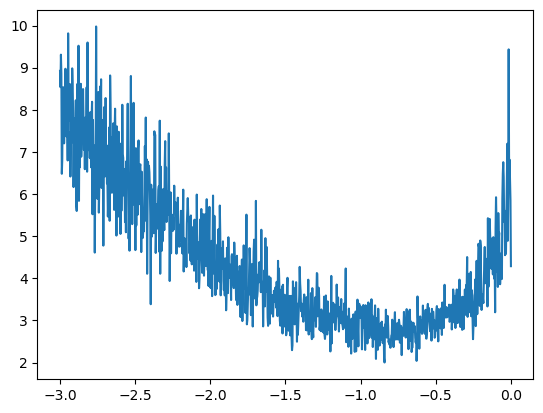

In [33]:
import matplotlib.pyplot as plt
plt.plot (lre, lossi)


In [37]:
# Let us estimate complete loss for the whole dataset to get idea of how well we are doing
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss 

tensor(2.4185, grad_fn=<NllLossBackward0>)

In [ ]:
torch.randint (0, X.shape[0], (32,))

tensor([186936,  72032,  46495,  76549,   2463, 131520, 110722,  39913,  97799,
        111178, 204998, 220002,  70787, 218589,  49515, 100082,  23185,  96536,
           825, 219741,  13886, 225536,  78746, 165931,   5315,  34969,  82335,
          5123, 170826, 176070,  97160, 215837])

In [ ]:
X.shape[1]

3

In [ ]:
# Training split - 80% of the data
# Validation split - 10% of the data - To tune the hyperparameters
# Test split - 10% of the data

In [40]:
# build the dataset for training, validation and test

def build_dataset(words):
    block_size = 3 
    X, Y = [], []
    for w in words: 

        #print (w)
        context = [0] * block_size # context window [0, 0, 0]
        for ch in w + '.': 
            ix = stoi[ch]
            #print (ch, ix)
            X.append(context)
            Y.append(ix)
            #print ( ''.join(itos[i] for i in context), '->', itos[ix])
            context = context[1:] + [ix] # add new char in the end and removes the first one

    X = torch.tensor(X) # X has trigram contexts
    Y = torch.tensor(Y) # Y has index of each character that the trigram corresponds to. For example for first letter e, trigram is [0, 0, 0] and Y[0] = 5; for second letter e, trigram is [0, 0, 5] and Y[1] = 5;
    print (X.shape, Y.shape)
    return X, Y

import random
random.seed(2147483647)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xts, Yts = build_dataset(words[n2:])

torch.Size([182546, 3]) torch.Size([182546])
torch.Size([22840, 3]) torch.Size([22840])
torch.Size([22760, 3]) torch.Size([22760])


In [41]:
len(words)
n1

25626

In [42]:
n2

28829

In [43]:
n2-n1

3203

In [44]:
len(words)-n2

3204

In [53]:
Xtr.shape, Xtr.dtype, Ytr.shape, Ytr.dtype # input dataset

(torch.Size([182546, 3]), torch.int64, torch.Size([182546]), torch.int64)

In [81]:
g = torch.Generator().manual_seed(2147483627) # setting the seed for reproducibility 2147483647
C = torch.randn(27,10, generator=g) # 27 characters and 2 features (x,y)  # increasing the number of features to 10
W1 = torch.randn(30, 200, generator=g) # 3 * 2 = 6 (inputs) and 100 is the number of neurons in the hidden layer # 3 * 10 = 30 (inputs) and 200 is the number of neurons in the hidden layer
b1 = torch.randn(200, generator=g) # biases for each neuron
W2 = torch.randn(200, 27, generator=g) # 100 neurons in the hidden layer and 27 characters in the output layer # 200 neurons in the hidden layer and 27 characters in the output layer
b2 = torch.randn(27, generator=g) # biases for each output
paramaters = [C, W1, b1, W2, b2]

In [82]:
sum(p.nelement() for p in paramaters) # total number of elements in the paramaters

11897

In [83]:
for p in paramaters:
    p.requires_grad = True # this will tell pytorch to track the gradients

In [84]:
# Idenitfy the range in which the loss is decreasing and then follow this exponential procedure
torch.linspace (0.001, 1, 1000) # 1000 numbers between 0.1 and 1
# steping thru 1000 does make sense 
lre = torch.linspace (-3, 0, 1000) 
lrs = 10 ** lre # 1000 numbers between 10**-3 = 0.001 and 10**0 = 1

In [94]:
lri = []
lossi = []
stepi = []

In [100]:

for i in range(20000): 

  # minibatch construct 
  ix = torch.randint(0, Xtr.shape[0], (32,)) # 32 random indices
  # forward pass
  emb = C[Xtr[ix]] # embedding layer # shortcut to one-hot encoding, both are same which will be for X = 228146 X 3 and Y = 32 X 1; bringing the minibatch size to 32 from 228146
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # 228146 x 6 @ 6 x 100 + 100 = 32 x 100; It will infer the size of the dimension from w1 
  # hidden layer
  logits = h @ W2 + b2 # 228146 x 100 @ 100 x 27 + 27 = 228146 x 27
  loss = F.cross_entropy(logits, Ytr[ix]) # this is the same as the loss function we have created above
  #print(loss.item())

  # backward pass
  for p in paramaters:
    p.grad = None # setting the gradients to zero
  loss.backward() # backward pass

  # updating the weights
  #lr = lrs[i] # learning rate
  # we found the learning rate that works for us around 0.1 and use that rate for the rest of the training
  #lr = 0.1
  # then run learning rate decay..
  lr = 0.1
  for p in paramaters:
    p.data += -lr * p.grad # nudge each node / parameters 

  # track stats
  stepi.append(i)
  lri.append(lre)
  lossi.append(loss.log10().item()) # log10 of the loss function, To avoid hockey stick graph and to get a smooth curve

print("Final loss", loss.item())

Final loss 2.1757376194000244


In [101]:
len(stepi), len(lossi)

(40000, 40000)

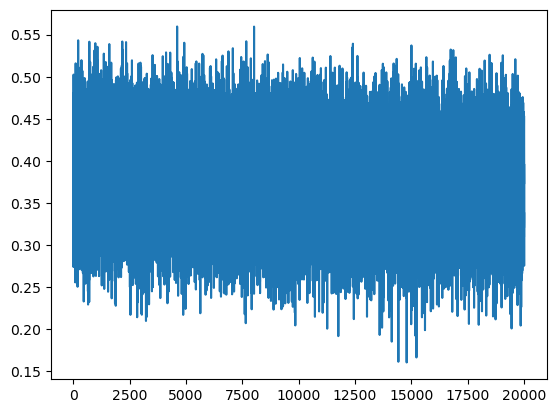

In [102]:
plt.plot (stepi, lossi)

In [103]:
# Over all loss for the training set
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss 

tensor(2.3749, grad_fn=<NllLossBackward0>)

In [104]:
# Dev set
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss 
# Overall loss on the training set is 2.5158 and on the dev set is 2.5221. Training data did not see this new dev data, so we can say that the model is not overfitting.But we underfitting. That means the network is not complex enough to capture the patterns in the data. We can increase the number of neurons in the hidden layer and see if that helps. Let us increase the number of neurons to 300 and see if that helps.

tensor(2.4187, grad_fn=<NllLossBackward0>)

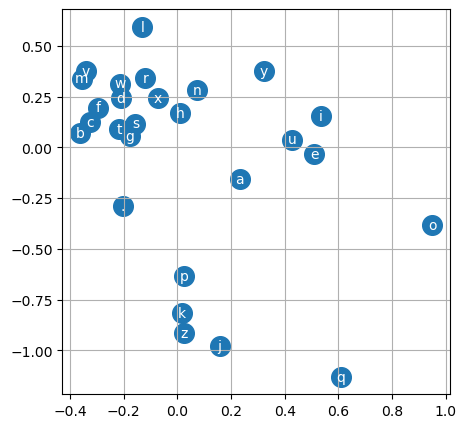

In [76]:
plt.figure(figsize=(5,5))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white' )
plt.grid('minor')

In [ ]:
# There is grouping of chars. a, e, i, o, u are grouped togather... '.' is seperate group. Other likely and unlikely chars are also grouped togather. This is a good sign that the network is learning something. But we are unfitted.. since we see training loss and dev loss are close to each other. We can increase the feature vectors and play around with nuerons. 

In [80]:
C.shape[1]

2

In [110]:
# how to sample from the model
g = torch.Generator().manual_seed(2147483647 * 9)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize will all '...' chars
    while True:
        emb = C[torch.tensor([context])] # (1, block_size=3 ) 
        h = torch.tanh(emb.view(1, -1) @ W1 + b1) # (1, block_size, #) @ (#, 100) + (100,) = (1, 100)
        logits = h @ W2 + b2 # (1, 100) @ (100, 27) + (27,) = (1, 27)
        probs = F.softmax(logits, dim=1) # (1, 27)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item() # (1, 1)
        context = context[1:] + [ix] # (3, ) + (1, ) = (3, )
        out.append(ix)
        if ix == 0:
            break
    
    print("".join(itos[i] for i in out))


axhidki.
maha.
aura.
lora.
mani.
rar.
sarivran.
liuira.
jaiva.
aveirloy.
anny.
irasra.
btolyn.
mavilsan.
gar.
brysely.
vaani.
aventley.
raviausairotta.
arlia.
